# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 2
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [6]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'pseudo_train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.636s 


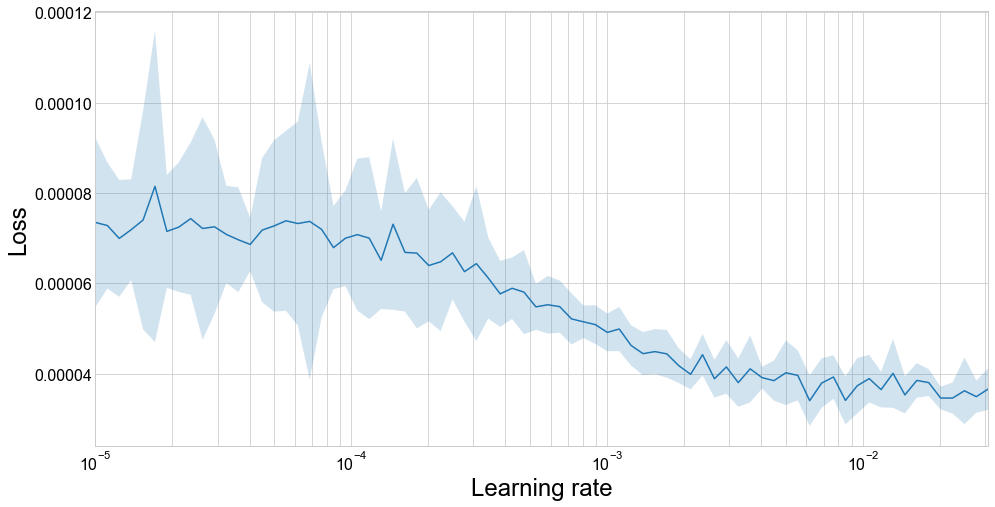

______________________________________



In [7]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.3494162287467103e-05
2 New best found: 3.1251350577619516e-05
3 New best found: 3.0968467955218404e-05
4 New best found: 3.0624923153513834e-05
5 New best found: 2.972758020216545e-05
6 New best found: 2.937384930813088e-05
7 New best found: 2.9207264546658048e-05
10 New best found: 2.908599202641484e-05
11 New best found: 2.887690176432633e-05
12 New best found: 2.8494943980020672e-05
13 New best found: 2.8454158588881782e-05
14 New best found: 2.8288575807931837e-05
15 New best found: 2.8256847588616272e-05
21 New best found: 2.8249826953841972e-05
23 New best found: 2.803021944427844e-05
24 New best found: 2.7972700118413557e-05
26 New best found: 2.792655028370097e-05
27 New best found: 2.7758187295728315e-05
28 New best found: 2.7746438404781287e-05
29 New best found: 2.7712935441725306e-05
30 New best found: 2.7699189685260517e-05
31 New best found: 2.769

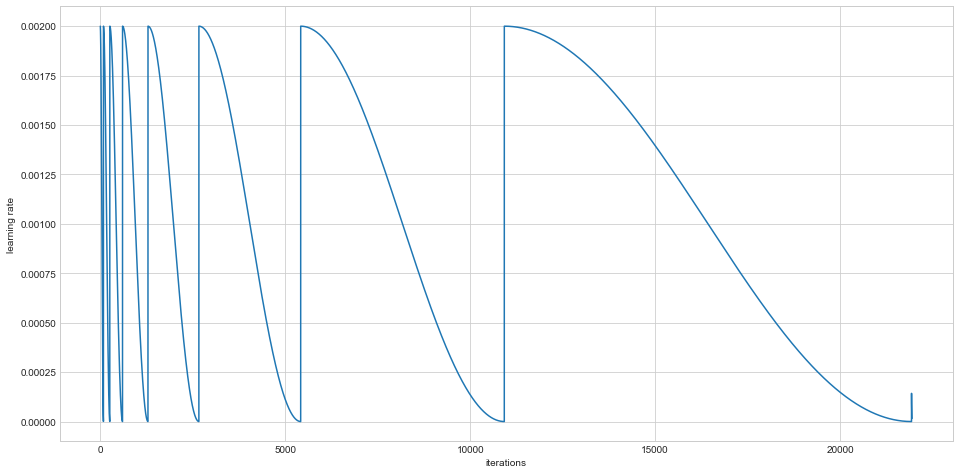

Fold took 155.635s

Running fold 2 / 10
1 New best found: 3.375503019745925e-05
2 New best found: 3.134214755562273e-05
3 New best found: 3.082117466123436e-05
4 New best found: 3.0405635122628766e-05
5 New best found: 2.975988666195644e-05
6 New best found: 2.9506668421069252e-05
7 New best found: 2.9328373400260786e-05
10 New best found: 2.8918557790563135e-05
11 New best found: 2.87947432635163e-05
12 New best found: 2.8613774190290572e-05
13 New best found: 2.8569223955207264e-05
14 New best found: 2.840440062044227e-05
15 New best found: 2.8360147998861494e-05
23 New best found: 2.807751633703228e-05
24 New best found: 2.7999578582177114e-05
27 New best found: 2.7922902288226215e-05
28 New best found: 2.7845972029390116e-05
29 New best found: 2.777423524527174e-05
30 New best found: 2.7761656666549317e-05
46 New best found: 2.7705273461642128e-05
48 New best found: 2.7605783045227168e-05
50 New best found: 2.760071252906272e-05
51 New best found: 2.7537632712519988e-05
52 New best

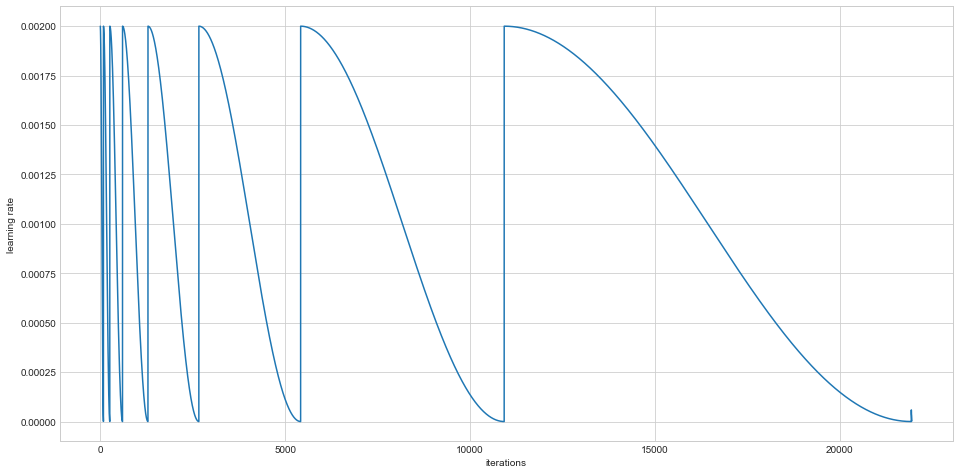

Fold took 163.529s

Running fold 3 / 10
1 New best found: 3.345407610445887e-05
2 New best found: 3.086054568895574e-05
3 New best found: 3.0212476914608755e-05
5 New best found: 2.948339599602671e-05
6 New best found: 2.8993306407959042e-05
7 New best found: 2.893437750137432e-05
11 New best found: 2.8369006829385736e-05
12 New best found: 2.8280615759252567e-05
14 New best found: 2.8175788665960227e-05
15 New best found: 2.8119505195597252e-05
23 New best found: 2.784092894073334e-05
24 New best found: 2.7798919936046607e-05
25 New best found: 2.7632187064769954e-05
26 New best found: 2.7631421917044884e-05
27 New best found: 2.760481579772293e-05
28 New best found: 2.7500719447516852e-05
29 New best found: 2.744814847069684e-05
30 New best found: 2.7439695606720017e-05
31 New best found: 2.743598445094678e-05
47 New best found: 2.7398543275008108e-05
48 New best found: 2.7339356391041577e-05
51 New best found: 2.7327915246674128e-05
52 New best found: 2.7139090889566427e-05
56 New b

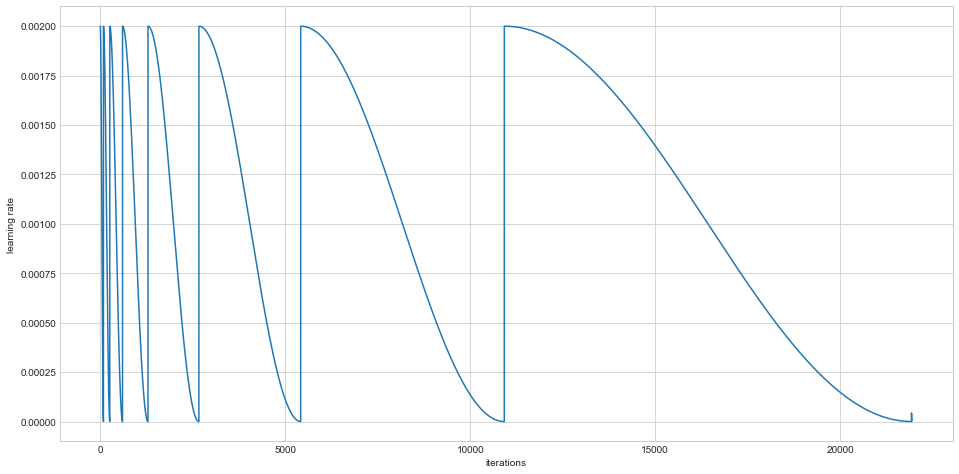

Fold took 166.907s

Running fold 4 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100797). Check your callbacks.
  % delta_t_median)


1 New best found: 3.3553641557732174e-05
2 New best found: 3.132165219530882e-05
3 New best found: 3.0715735466049986e-05
4 New best found: 3.0543733687597874e-05
5 New best found: 2.961730433758641e-05
6 New best found: 2.9283988041625395e-05
7 New best found: 2.919142038759694e-05
10 New best found: 2.8791966440492574e-05
11 New best found: 2.8786641296810765e-05
12 New best found: 2.8677977904144634e-05
13 New best found: 2.821636418999612e-05
14 New best found: 2.8158620276185914e-05
15 New best found: 2.8147227460392928e-05
21 New best found: 2.802675526274615e-05
23 New best found: 2.7898360863683922e-05
24 New best found: 2.7819343549910256e-05
25 New best found: 2.7732831174200164e-05
26 New best found: 2.7638566047373428e-05
27 New best found: 2.7622585136038487e-05
28 New best found: 2.7516092729549447e-05
30 New best found: 2.7461351981985032e-05
31 New best found: 2.745779448160461e-05
48 New best found: 2.735642956548387e-05
49 New best found: 2.7350629161586874e-05
50 New

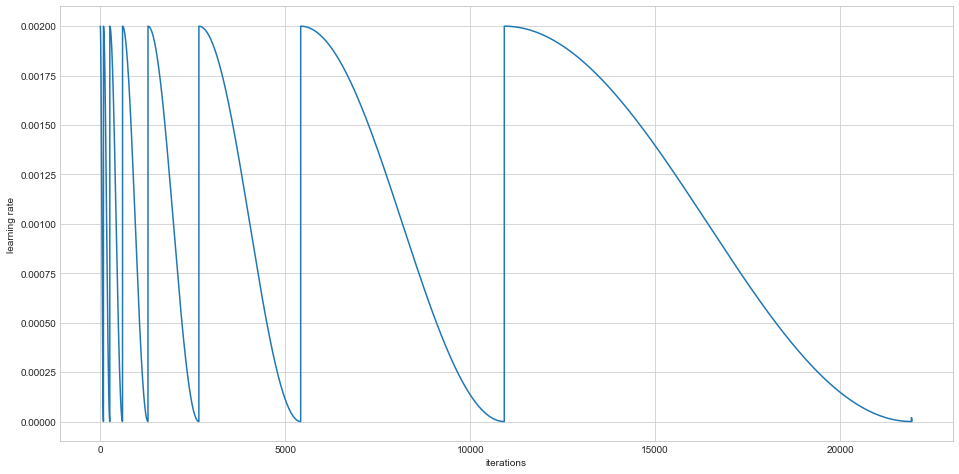

Fold took 171.947s

Running fold 5 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.225441). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113024). Check your callbacks.
  % delta_t_median)


1 New best found: 3.347673032687288e-05
2 New best found: 3.135933158396463e-05
3 New best found: 3.0901810942333956e-05
4 New best found: 3.080856687296835e-05
5 New best found: 3.015843173969043e-05
6 New best found: 2.9716306564358258e-05
7 New best found: 2.9608987846317674e-05
10 New best found: 2.9244232993702016e-05
11 New best found: 2.9194205800913344e-05
12 New best found: 2.9115578993908416e-05
13 New best found: 2.8818882754584573e-05
14 New best found: 2.8732591371217287e-05
15 New best found: 2.872864003003108e-05
19 New best found: 2.872465131796079e-05
22 New best found: 2.8538872239189252e-05
25 New best found: 2.822945045066273e-05
26 New best found: 2.8163177651410107e-05
27 New best found: 2.8146867779360656e-05
28 New best found: 2.8092344667261282e-05
29 New best found: 2.8014230144099822e-05
47 New best found: 2.7967641226664145e-05
49 New best found: 2.778341358465042e-05
52 New best found: 2.768234575552791e-05
54 New best found: 2.759042858792265e-05
56 New be

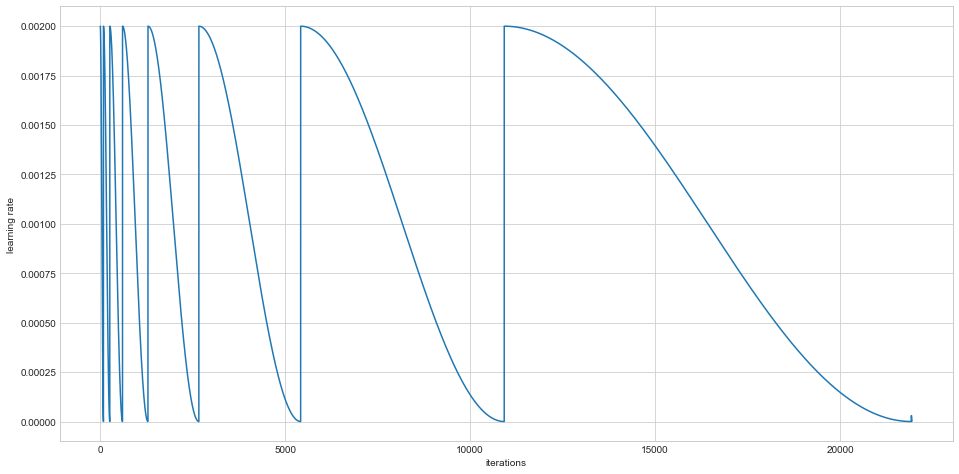

Fold took 172.111s

Running fold 6 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114662). Check your callbacks.
  % delta_t_median)


1 New best found: 3.3309230671462e-05
2 New best found: 3.116963770860986e-05
3 New best found: 3.060561685554768e-05
4 New best found: 3.0203730919827815e-05
5 New best found: 2.9572467611858015e-05
6 New best found: 2.9232796397381704e-05
7 New best found: 2.905365529457785e-05
11 New best found: 2.8458522852939825e-05
12 New best found: 2.822536099582025e-05
13 New best found: 2.8162434869996518e-05
14 New best found: 2.8109087580891024e-05
15 New best found: 2.8074420450598775e-05
21 New best found: 2.8065378166181952e-05
23 New best found: 2.7732230697417683e-05
25 New best found: 2.7640646825432215e-05
26 New best found: 2.7510518583695062e-05
27 New best found: 2.7444040207879798e-05
28 New best found: 2.7418868515228084e-05
29 New best found: 2.7382657420870062e-05
30 New best found: 2.735743192734865e-05
31 New best found: 2.7356328154708495e-05
43 New best found: 2.719577517430077e-05
47 New best found: 2.710003043769792e-05
50 New best found: 2.708672276563365e-05
52 New bes

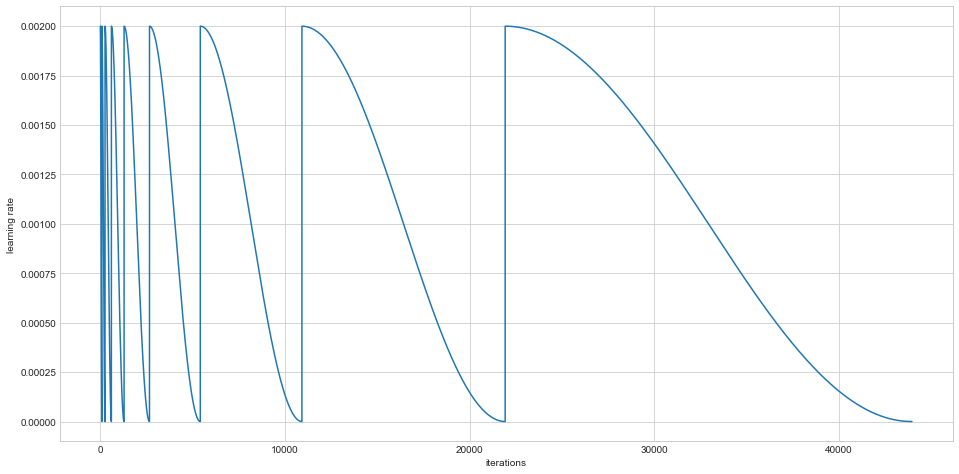

Fold took 334.946s

Running fold 7 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119583). Check your callbacks.
  % delta_t_median)


1 New best found: 3.3358832302300554e-05
2 New best found: 3.106916767323624e-05
3 New best found: 3.0414365926312506e-05
5 New best found: 2.943135871210891e-05
6 New best found: 2.9140243241386088e-05
7 New best found: 2.904158441473018e-05
11 New best found: 2.8819929107219817e-05
12 New best found: 2.8495303194218153e-05
13 New best found: 2.8291487194425455e-05
14 New best found: 2.8155028855495217e-05
15 New best found: 2.8137578217529773e-05
23 New best found: 2.796693815458246e-05
25 New best found: 2.769330350115369e-05
26 New best found: 2.767065972480251e-05
27 New best found: 2.7617992050835482e-05
28 New best found: 2.7533734805501807e-05
29 New best found: 2.7503043462233606e-05
30 New best found: 2.749664185363217e-05
31 New best found: 2.7487448698521307e-05
44 New best found: 2.7408239879750082e-05
49 New best found: 2.7315194112427384e-05
50 New best found: 2.7216804501120153e-05
51 New best found: 2.717039430290475e-05
53 New best found: 2.714649423873668e-05
54 New 

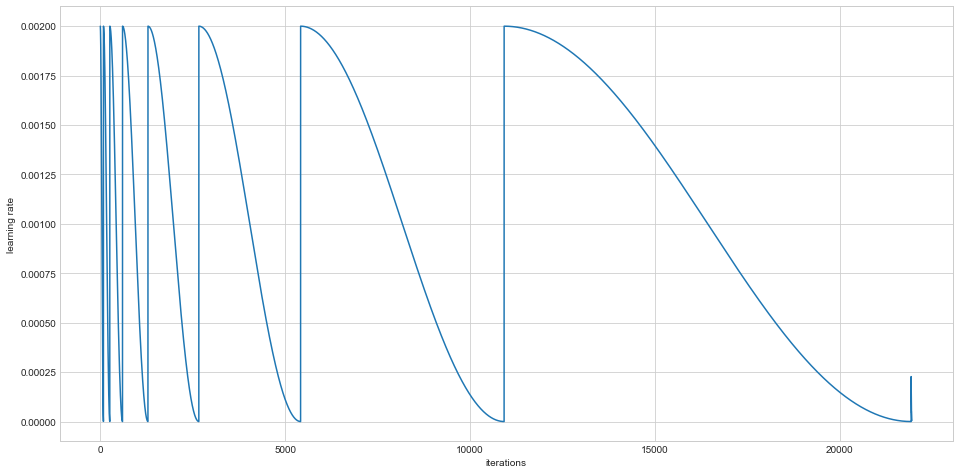

Fold took 179.749s

Running fold 8 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258590). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129572). Check your callbacks.
  % delta_t_median)


1 New best found: 3.4592120888638045e-05
2 New best found: 3.2183522273289144e-05
3 New best found: 3.152337995948588e-05
4 New best found: 3.110701499724199e-05
5 New best found: 3.0282396195775344e-05
6 New best found: 3.0033481597936276e-05
7 New best found: 2.979298066802135e-05
10 New best found: 2.950844800320094e-05
12 New best found: 2.9098476669845286e-05
13 New best found: 2.8745271306530752e-05
15 New best found: 2.8705881298936176e-05
22 New best found: 2.8522183702364585e-05
25 New best found: 2.843024035896779e-05
26 New best found: 2.8112299470876307e-05
27 New best found: 2.8046916752839676e-05
29 New best found: 2.8004283319771173e-05
30 New best found: 2.8003790276327074e-05
31 New best found: 2.799244713169731e-05
47 New best found: 2.790928512650707e-05
50 New best found: 2.785194419079655e-05
52 New best found: 2.7743741927748152e-05
54 New best found: 2.7692087215951094e-05
56 New best found: 2.7623885514843346e-05
57 New best found: 2.7598159746437445e-05
62 New 

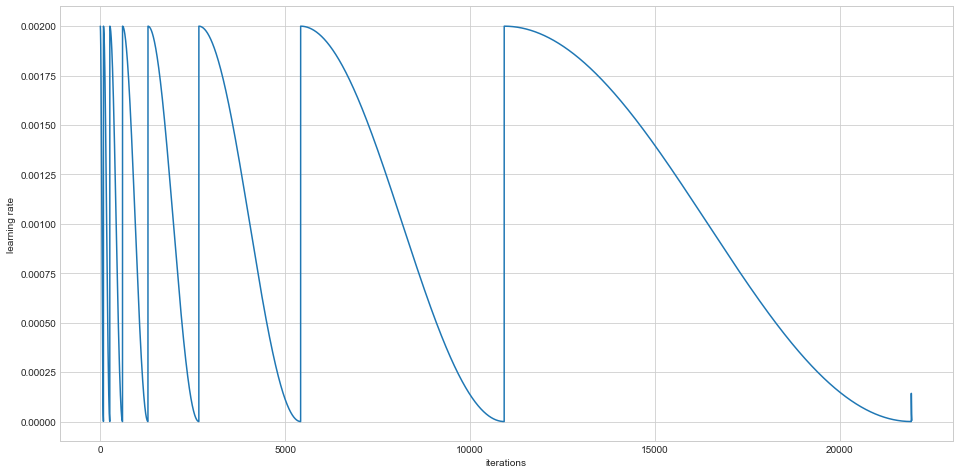

Fold took 183.541s

Running fold 9 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.277325). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139019). Check your callbacks.
  % delta_t_median)


1 New best found: 3.306982922905312e-05
2 New best found: 3.119621402702894e-05
3 New best found: 3.061559828106108e-05
5 New best found: 2.9661756893844068e-05
6 New best found: 2.9295147187706566e-05
7 New best found: 2.918879652993262e-05
12 New best found: 2.8797779293305615e-05
13 New best found: 2.856135026438412e-05
14 New best found: 2.840668179890693e-05
15 New best found: 2.839425100554216e-05
25 New best found: 2.8268626643056453e-05
26 New best found: 2.8150694916201283e-05
27 New best found: 2.797891529751235e-05
28 New best found: 2.792703232208168e-05
29 New best found: 2.7899790264525634e-05
30 New best found: 2.7893152858068348e-05
31 New best found: 2.7890273100490833e-05
48 New best found: 2.7825413146048834e-05
50 New best found: 2.7745718155628545e-05
51 New best found: 2.7699938132860532e-05
55 New best found: 2.756764643969737e-05
57 New best found: 2.7538772566758e-05
58 New best found: 2.751036498829842e-05
59 New best found: 2.7457821656536102e-05
104 New best

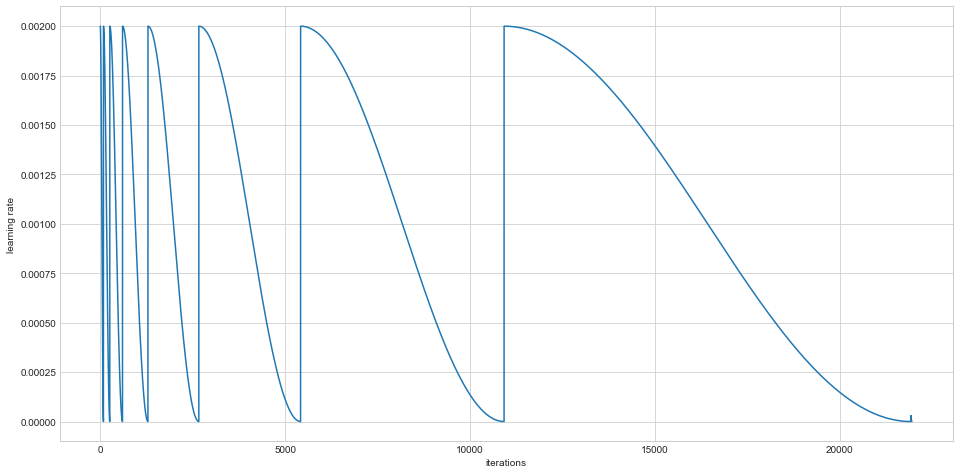

Fold took 189.131s

Running fold 10 / 10


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302037). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151359). Check your callbacks.
  % delta_t_median)


1 New best found: 3.3940054314639073e-05
2 New best found: 3.174397197499002e-05
3 New best found: 3.068224370244352e-05
4 New best found: 3.0634186844846214e-05
5 New best found: 2.9919133557703426e-05
6 New best found: 2.9455878030817383e-05
7 New best found: 2.941299764505317e-05
12 New best found: 2.8827583687165377e-05
13 New best found: 2.8581122427663754e-05
14 New best found: 2.8486402404079528e-05
15 New best found: 2.8472348949191673e-05
23 New best found: 2.844943359915667e-05
24 New best found: 2.8066973910037928e-05
27 New best found: 2.796786233625676e-05
28 New best found: 2.7877170777870043e-05
30 New best found: 2.7868407392483414e-05
31 New best found: 2.785963727200179e-05
49 New best found: 2.7706344838242903e-05
53 New best found: 2.7635137297209516e-05
54 New best found: 2.762186973087831e-05
55 New best found: 2.7619909865728626e-05
57 New best found: 2.759701532455877e-05
58 New best found: 2.7506125355155232e-05
59 New best found: 2.7495286771959048e-05
60 New 

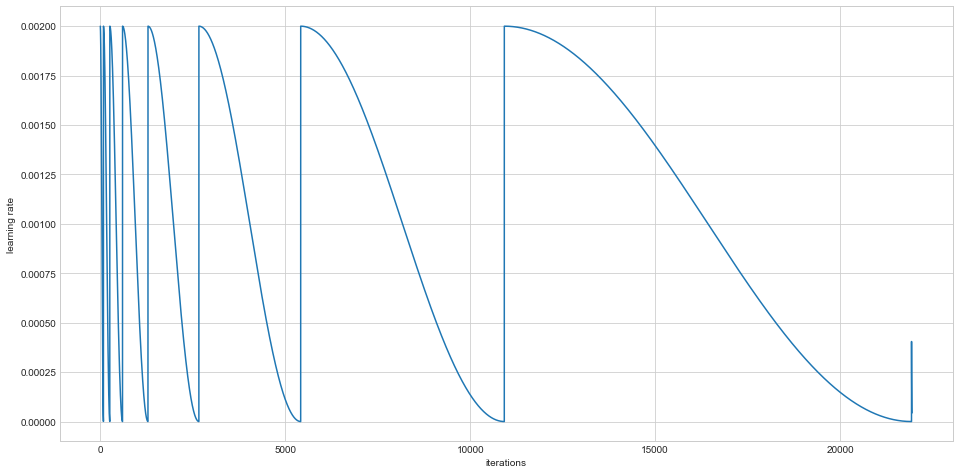

Fold took 184.561s


______________________________________
Training finished
Cross-validation took 1905.552s 


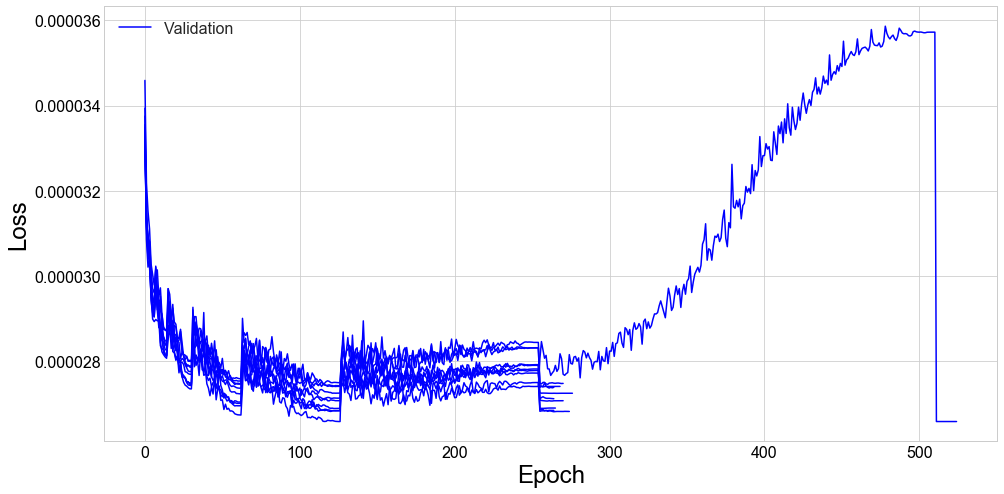

Mean loss = 2.708e-05 +- 9e-08
Mean wAUC = 0.0556 +- 0.0003
Mean AUC = 0.0871 +- 0.0004
Mean AMS = 11.6 +- 0.6
Mean cut = 0.9968 +- 0.0004
______________________________________



<Figure size 432x288 with 0 Axes>

In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,
                                          patience=patience, verbose=1, amsSize=250000)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [9]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 2.6590147800629504e-05
Model 1 is 6 with loss = 2.6820445510714143e-05
Model 2 is 2 with loss = 2.6826869298535008e-05
Model 3 is 3 with loss = 2.689515164667775e-05
Model 4 is 1 with loss = 2.7071041502239852e-05
Model 5 is 0 with loss = 2.7121460546043484e-05
Model 6 is 8 with loss = 2.7251977471026633e-05
Model 7 is 9 with loss = 2.7374359068844444e-05
Model 8 is 4 with loss = 2.7409945491431063e-05
Model 9 is 7 with loss = 2.7461055062593557e-05


## Response on validation data with TTA

In [11]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.007534856753400527s per sample

Predicting batch 2 out of 10
Prediction took 0.00654716523620009s per sample

Predicting batch 3 out of 10
Prediction took 0.006663106152399996s per sample

Predicting batch 4 out of 10
Prediction took 0.006528954287200031s per sample

Predicting batch 5 out of 10
Prediction took 0.006589286086199718s per sample

Predicting batch 6 out of 10
Prediction took 0.00656187568979949s per sample

Predicting batch 7 out of 10
Prediction took 0.006562505567799963s per sample

Predicting batch 8 out of 10
Prediction took 0.006533571165000467s per sample

Predicting batch 9 out of 10
Prediction took 0.006582389013800275s per sample

Predicting batch 10 out of 10
Prediction took 0.006609050980600295s per sample



In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.623457307486658, weighted 0.7152824654405335


In [14]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(0.6219461639710049, 0.9005304)

In [15]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=1.25+-0.02, at mean cut of 0.21+-0.02
Exact mean cut 0.2129122701298911, corresponds to AMS of 1.2450575639639025
CPU times: user 3.48 s, sys: 5.27 s, total: 8.75 s
Wall time: 1min 26s


(1.25, 0.21)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

In [16]:
val = convertToDF(valData.source)

50000 candidates loaded


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


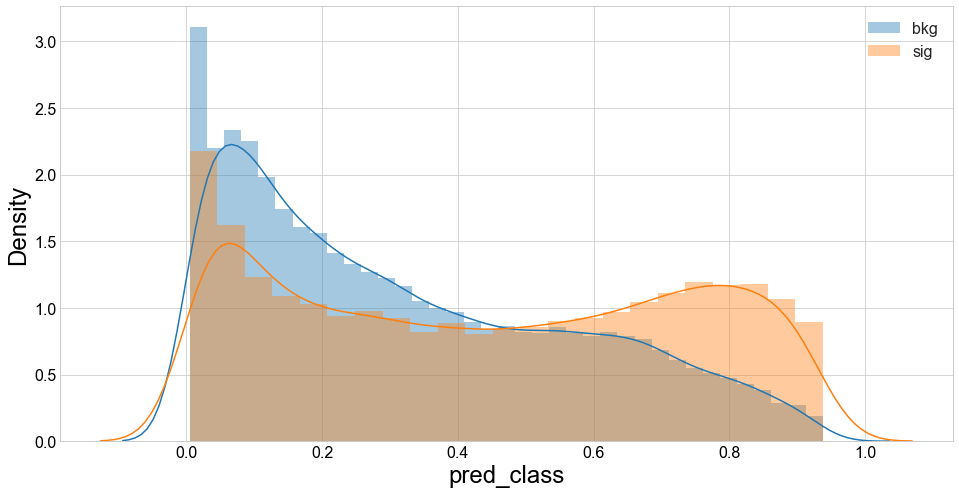

In [17]:
plotFeat(val, 'pred_class', [(val.gen_target==0), (val.gen_target==1)], ['bkg', 'sig'])

In [20]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=1, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0014981179564110437s per sample

Predicting batch 2 out of 10
Prediction took 0.0014783934862051737s per sample

Predicting batch 3 out of 10
Prediction took 0.0014895591707650255s per sample

Predicting batch 4 out of 10
Prediction took 0.00148920052813628s per sample

Predicting batch 5 out of 10
Prediction took 0.001491949366636287s per sample

Predicting batch 6 out of 10
Prediction took 0.001570565942590871s per sample

Predicting batch 7 out of 10
Prediction took 0.0015145464740455117s per sample

Predicting batch 8 out of 10
Prediction took 0.001554763205064063s per sample

Predicting batch 9 out of 10
Prediction took 0.0015799437199746158s per sample

Predicting batch 10 out of 10
Prediction took 0.001556235168151607s per sample



In [21]:
train = convertToDF(trainData.source)

219997 candidates loaded


/Users/giles/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


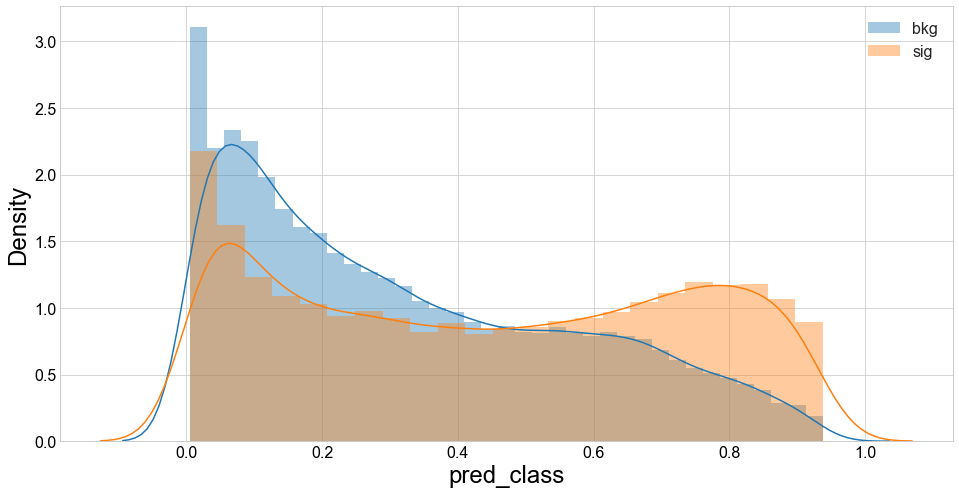

In [22]:
plotFeat(val, 'pred_class', [(val.gen_target==0), (val.gen_target==1)], ['bkg', 'sig'])

# Test scoring

In [ ]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [ ]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

In [ ]:
scoreTestOD(testData.source, 0.9619597619166598)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA_Pseudo1"

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)